Found 5869 images belonging to 14 classes.
Found 1462 images belonging to 14 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 62s 1us/step
Training MobileNetV2...


c:\Users\91843\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 447s 2s/step - accuracy: 0.3499 - loss: 2.1879 - val_accuracy: 0.6792 - val_loss: 1.1443
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - accuracy: 0.6842 - loss: 1.0584 - val_accuracy: 0.7722 - val_loss: 0.8262
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.7605 - loss: 0.7982 - val_accuracy: 0.7934 - val_loss: 0.6949
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 366s 2s/step - accuracy: 0.7871 - loss: 0.6643 - val_accuracy: 0.8092 - val_loss: 0.6192
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.8341 - loss: 0.5459 - val_accuracy: 0.8283 - val_loss: 0.5860
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 333s 2s/step - accuracy: 0.8364 - loss: 0.5121 - val_accuracy: 0.8379 - val_loss: 0.5508
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 361s 2s/step - accuracy: 0.8531 - loss: 0.4684 - val_accuracy: 0.8406 - val_loss: 0.5334
Epoch 8/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 370s 2s/step - accuracy: 0.8768 - loss: 0.3992 - val_accu

Training ResNet50...
Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 843s 5s/step - accuracy: 0.2584 - loss: 2.3155 - val_accuracy: 0.3126 - val_loss: 2.0429
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 814s 4s/step - accuracy: 0.2863 - loss: 2.0988 - val_accuracy: 0.3126 - val_loss: 2.0250
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 797s 4s/step - accuracy: 0.3061 - loss: 2.0429 - val_accuracy: 0.3133 - val_loss: 2.0022
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 815s 4s/step - accuracy: 0.3021 - loss: 2.0035 - val_accuracy: 0.3153 - val_loss: 1.9787
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 750s 4s/step - accuracy: 0.3156 - loss: 1.9739 - val_accuracy: 0.3140 - val_loss: 1.9763
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 806s 4s/step - accuracy: 0.3220 - loss: 1.9818 - val_accuracy: 0.3194 - val_loss: 1.9550
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 802s 4s/step - accuracy: 0.3262 - loss: 1.9656 - val_accuracy: 0.3379 - val_loss: 1.9407
Epoch 8/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 887s 5s/step - accuracy: 0.3254 - lo

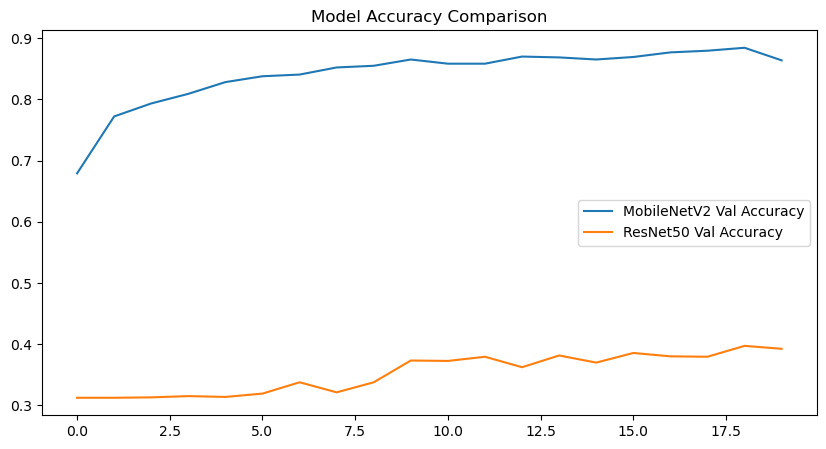

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2, ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os

# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20
DATASET_PATH = "dataset/dataset"  # Update with actual dataset path

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Define model function
def build_model(base_model):
    base_model.trainable = False  # Freeze base model layers
    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(train_generator.num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train and evaluate models
models = {
    "MobileNetV2": MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "ResNet50": ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
}

results = {}

for name, base_model in models.items():
    print(f"Training {name}...")
    model = build_model(base_model)
    history = model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)
    results[name] = history
    model.save(f"{name}_millet_model.h5")

# Plot accuracy comparison
plt.figure(figsize=(10, 5))
for name, history in results.items():
    plt.plot(history.history['val_accuracy'], label=f"{name} Val Accuracy")
plt.legend()
plt.title("Model Accuracy Comparison")
plt.show()


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
IMG_SIZE = (224, 224)  # Adjust based on your model input size
BATCH_SIZE = 32  

# Define validation data directory
val_dir = "dataset/dataset"  # Change this to your validation dataset path

# Create validation data generator
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# Get class names (assuming folder names represent classes)
class_names = list(val_data.class_indices.keys())


Found 7331 images belonging to 14 classes.


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the combined model (Modify the filename accordingly)
from tensorflow.keras.models import load_model

mobilenet_model = load_model("MobileNetV2_millet_model.h5") 
resnet_model = load_model("ResNet50_millet_model.h5")

# Function to evaluate the model
# Get Predictions
def evaluate_model(model, data):
    y_true = []
    y_pred = []
    confidences = []

    for images, labels in data:
        preds = model.predict(images)
        y_pred.extend(np.argmax(preds, axis=1))
        y_true.extend(np.argmax(labels, axis=1))
        confidences.extend(np.max(preds, axis=1))

        if len(y_true) > 1000:  # Limit evaluation set size
            break

    return np.array(y_true), np.array(y_pred), np.array(confidences)

y_true_mobilenet, y_pred_mobilenet, conf_mobilenet = evaluate_model(mobilenet_model,val_generator)
y_true_resnet, y_pred_resnet, conf_resnet = evaluate_model(resnet_model, val_generator)

# Compute Metrics
def compute_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1 Score": f1_score(y_true, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_true, y_pred)
    }

metrics_mobilenet = compute_metrics(y_true_mobilenet, y_pred_mobilenet)
metrics_resnet = compute_metrics(y_true_resnet, y_pred_resnet)

# Print Classification Reports
print("=== MobileNetV2 Metrics ===")
print(classification_report(y_true_mobilenet, y_pred_mobilenet, target_names=class_names))

print("\n=== ResNet50 Metrics ===")
print(classification_report(y_true_resnet, y_pred_resnet, target_names=class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

c:\Users\91843\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91843\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91843\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91843\anaconda3\Lib\site-packag

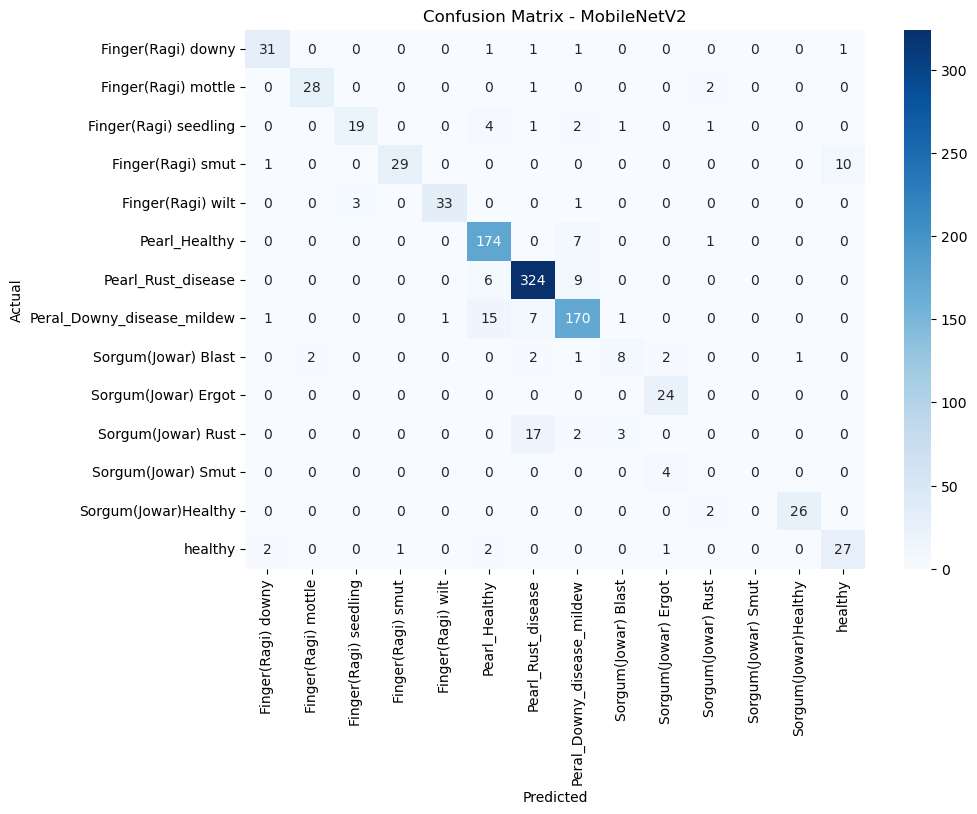

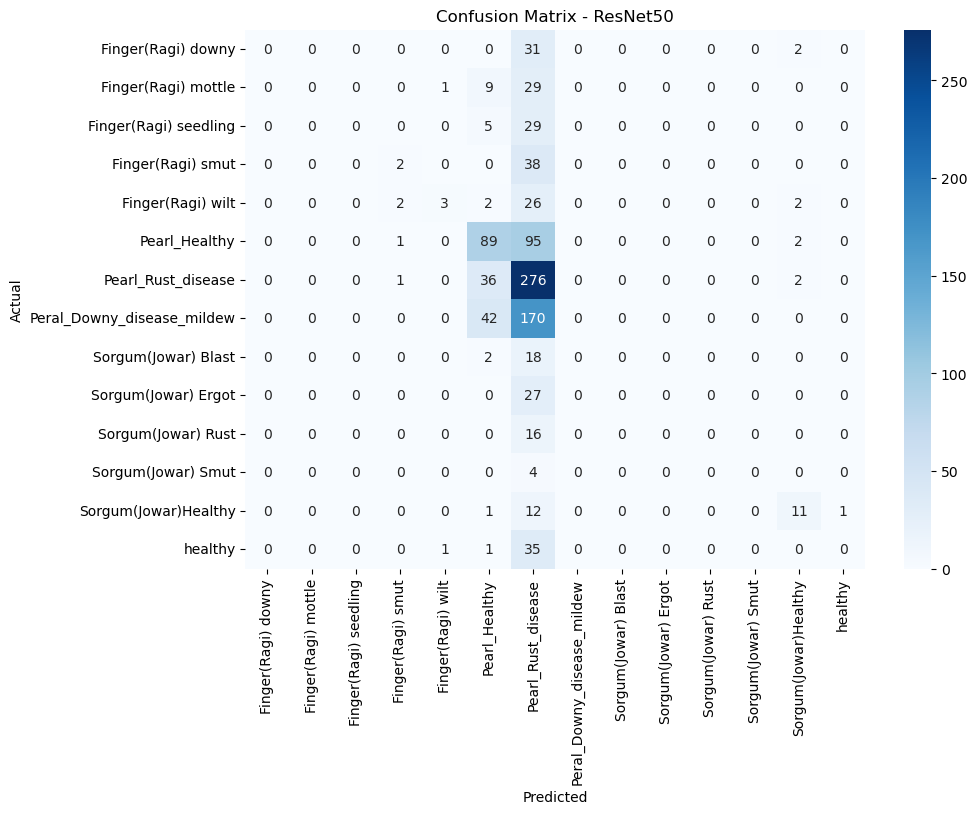

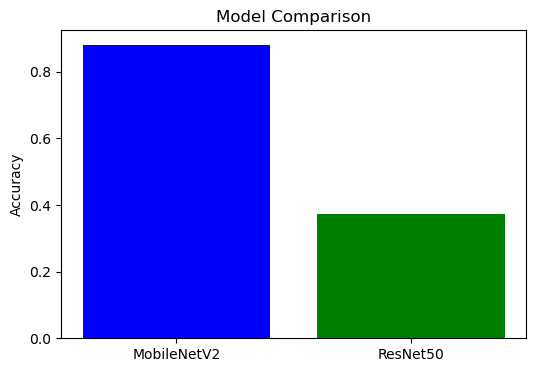

In [18]:
# Plot Confusion Matrices
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

plot_confusion_matrix(metrics_mobilenet["Confusion Matrix"], "MobileNetV2")
plot_confusion_matrix(metrics_resnet["Confusion Matrix"], "ResNet50")

# Compare Accuracy of Models
plt.figure(figsize=(6, 4))
plt.bar(["MobileNetV2", "ResNet50"], [metrics_mobilenet["Accuracy"], metrics_resnet["Accuracy"]], color=['blue', 'green'])
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()


In [24]:
import os
import shutil
import random

# Original Dataset Path (Modify as Needed)
ORIGINAL_DATASET_PATH = "dataset/dataset"

# New Structured Dataset Path
NEW_DATASET_PATH = "Dataset_Modified"

# Define Mapping (1 = Treatable, 0 = Non-Treatable)
stage_mapping = {
    "Finger(Ragi) Downy": 1,
    "Finger(Ragi) Mottle": 1,
    "Finger(Ragi) Seeding": 1,
    "Finger(Ragi) Smut": 0,
    "Finger(Ragi) Wilt": 0,
    "Pearl_Rust_disease": 1,
    "Pearl_Downy_diseases": 1,
    "Sorgum(Jowar) Blast": 1,
    "Sorgum(Jowar) Ergot": 0,
    "Sogum(Jowar) Rust": 1,
    "Sorgum(Jowar) Smut": 0
}


In [26]:
# Create Directories for Train & Validation Sets
for split in ["Train", "Validation"]:
    for category in ["Treatable", "Non-Treatable"]:
        os.makedirs(os.path.join(NEW_DATASET_PATH, split, category), exist_ok=True)


In [27]:
# Collect All Image Files
all_images = []
for class_name in os.listdir(ORIGINAL_DATASET_PATH):
    class_path = os.path.join(ORIGINAL_DATASET_PATH, class_name)

    if os.path.isdir(class_path):  # Ensure it's a directory
        label = stage_mapping.get(class_name)  # Get Treatable (1) or Non-Treatable (0)
        if label is not None:
            images = [os.path.join(class_path, img) for img in os.listdir(class_path)]
            all_images.extend([(img, label) for img in images])

# Shuffle Dataset
random.shuffle(all_images)

# Split Dataset (80% Train, 20% Validation)
split_idx = int(0.8 * len(all_images))
train_images = all_images[:split_idx]
val_images = all_images[split_idx:]

# Function to Move Images
def move_images(image_list, dataset_type):
    for img_path, label in image_list:
        category = "Treatable" if label == 1 else "Non-Treatable"
        dest_folder = os.path.join(NEW_DATASET_PATH, dataset_type, category)
        shutil.move(img_path, os.path.join(dest_folder, os.path.basename(img_path)))

# Move Train & Validation Images
move_images(train_images, "Train")
move_images(val_images, "Validation")

print("✅ Dataset organized successfully!")


✅ Dataset organized successfully!


In [31]:
# Load Image Data for Stage Classification
stage_data = datagen.flow_from_directory(
    'Dataset_Modified/Train',  # ✅ Now it correctly maps 'Treatable' and 'Non-Treatable'
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_data = datagen.flow_from_directory(
    'Dataset_Modified/Validation',  # ✅ Validation data
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Print class mapping
print("Class Mapping for Training Data:", stage_data.class_indices)
print("Class Mapping for Validation Data:", val_data.class_indices)


Found 2136 images belonging to 2 classes.
Found 534 images belonging to 2 classes.
Class Mapping for Training Data: {'Non-Treatable': 0, 'Treatable': 1}
Class Mapping for Validation Data: {'Non-Treatable': 0, 'Treatable': 1}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

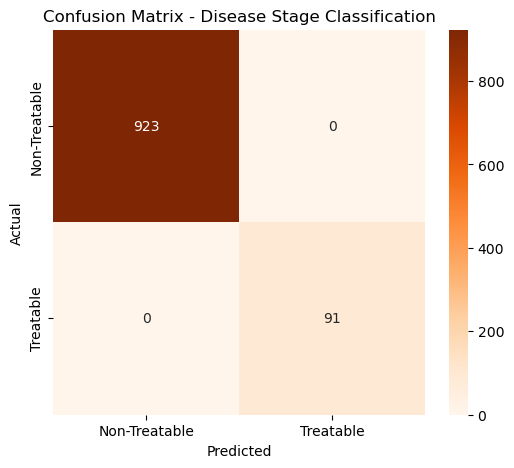

In [34]:
# Get Predictions
y_true_stage = []
y_pred_stage = []

for images, labels in val_data:
    preds = stage_model.predict(images)
    y_pred_stage.extend((preds > 0.5).astype(int).flatten())  # Convert predictions to binary format
    y_true_stage.extend(labels.astype(int).flatten())  # Directly use labels

    if len(y_true_stage) > 1000:  # Limit evaluation set
        break

y_true_stage = np.array(y_true_stage)
y_pred_stage = np.array(y_pred_stage)

# Compute Metrics
stage_metrics = {
    "Accuracy": accuracy_score(y_true_stage, y_pred_stage),
    "Precision": precision_score(y_true_stage, y_pred_stage),
    "Recall": recall_score(y_true_stage, y_pred_stage),
    "F1 Score": f1_score(y_true_stage, y_pred_stage),
    "Confusion Matrix": confusion_matrix(y_true_stage, y_pred_stage)
}

# Print Classification Report
print("=== Disease Stage Classification Metrics ===")
print(classification_report(y_true_stage, y_pred_stage, target_names=["Non-Treatable", "Treatable"]))

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(stage_metrics["Confusion Matrix"], annot=True, fmt="d", cmap="Oranges", xticklabels=["Non-Treatable", "Treatable"], yticklabels=["Non-Treatable", "Treatable"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Disease Stage Classification")
plt.show()


In [41]:
history_stage = stage_model.fit(stage_data, epochs=10, validation_data=val_data)

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 40s 582ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 9.5842e-04
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 1.0000 - loss: 5.2454e-04 - val_accuracy: 1.0000 - val_loss: 6.1468e-04
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 1.0000 - loss: 3.3977e-04 - val_accuracy: 1.0000 - val_loss: 4.8493e-04
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 1.0000 - loss: 3.6579e-04 - val_accuracy: 1.0000 - val_loss: 4.2153e-04
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 1.0000 - loss: 1.9997e-04 - val_accuracy: 1.0000 - val_loss: 4.1432e-04
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 1.0000 - loss: 2.0710e-04 - val_accuracy: 1.0000 - val_loss: 3.1254e-04
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 1.0000 - loss: 1.6461e-04 - val_accuracy: 1.0000 - val_loss: 2.6026e-04
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy:

In [42]:
stage_model.save("millet_disease_app/models/stage_classification_model.h5")